# Predicting Customer Churn for SyriaTel

# Business Understanding

## Overview
SyriaTel is a telecommunications company providing mobile services to customers across Syria. In the highly competitive telecom industry, customer retention is crucial for maintaining revenue and growth. Churn, refers to customers leaving the service thus poses a significant threat to the company's profitability and market share. Predicting customer churn allows SyriaTel to proactively address factors leading to customer dissatisfaction and implement strategies to retain valuable customers.

## Challenges
1. High Competition: The telecom industry is saturated with multiple service providers, offering similar services at competitive prices making it easy for customers to switch.

2. Customer Behavior Analysis: Understanding the diverse needs and behaviors of customers to identify those at risk of churning.
3. Data Quality: Ensuring the data used for analysis is accurate, complete, and up-to-date to build reliable predictive models.
4. Resource Allocation: Allocating resources effectively to retain customers at risk of churning while minimizing costs.

## Problem Statement
SyriaTel wants to predict customer churn based on historical data to identify customers at risk of leaving the service. By accurately predicting churn, SyriaTel can implement targeted retention strategies to reduce customer attrition and improve overall customer satisfaction.

## Objectives
1. To gather and pre-process customer data to ensure quality and completeness.

2. To identify and create relevant features that can contribute to customer churn.
3. To build and train various machine learning model to predict churn.
4. To asses the performance of the models using appropriate metrics and select the best-performing model.

## Proposed Solution
The proposed solution involves building a predictive model to identify customers at risk of churning based on historical data. By accurately predicting churn, SyriaTel can:
 - Target at-risk customers with personalized retention strategies.
 
 - Optimize marketing and promotional efforts.
 - Improve overall customer satisfaction and loyalty.

## Metrics of the Model
To evaluate the performance of the churn prediction model, the following metrics will be used:
1. **Accuracy**: The proportion of correctly predicted instances(both churn and non-churn) out of the total instances.

2. **Precision**: The proportion of correctly predicted churn instances out of all instances predicted as churn.
3. **Recall**: The proportion of correctly predicted churn instances out of all actual churn instances.
4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.

## Conclusion
By leveraging machine learning to predict customer churn, SyriaTel can gain valuable insights into customer behavior and proactively address churn risks. This approach not only helps in retaining customers but also enhances the overall customer experience and strengthens the company's competitive position in the telecom industry.

## Source of Data
The dataset used for this analysis is obtained from the [Kaggle website](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). The dataset contains information about customer demographics, usage patterns, and churn status for a telecom company. The dataset consists of 3333 observations and 21 features, including customer attributes such as account length, international plan, voicemail plan, total day minutes, total day calls, total day charge, etc.

# Data Understanding

In [1]:
# Remove warning messages 
import warnings 
warnings.filterwarnings("ignore")



In [2]:
# Import the necessary classes from data_processing.py
from data_processing import DataProcessor, DataAnalysis

# Load the data
processor = DataProcessor('data/telecom_dataset.xls')
data = processor.load_data()


In [3]:
# Exploration of the data
# Initial exploration of the data
print("First 5 rows of the data:")
# Print the first 5 rows of the data in pandas dataframe
data.head()


First 5 rows of the data:


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The dataset contains the following columns:
- State: The state in which the customer resides.

- Account Length: The number of days the customer has been with the company.
- Area Code: The area code of the customer's phone number.
- Phone: The customer's phone number.
- International Plan: Whether the customer has an international plan (yes/no).
- Voice Mail Plan: Whether the customer has a voicemail plan (yes/no).
- Number Vmail Messages: The number of voicemail messages.
- Total Day Minutes: Total number of minutes the customer used during the day.
- Total Day Calls: Total number of calls the customer made during the day.
- Total Day Charge: Total charges for calls made during the day.
- Total Eve Minutes: Total number of minutes the customer used during the evening.
- Total Eve Calls: Total number of calls the customer made during the evening.
- Total Eve Charge: Total charges for calls made during the evening.
- Total Night Minutes: Total number of minutes the customer used during the night.
- Total Night Calls: Total number of calls the customer made during the night.
- Total Night Charge: Total charges for calls made during the night.
- Total Intl Minutes: Total number of international minutes used.
- Total Intl Calls: Total number of international calls made.
- Total Intl Charge: Total charges for international calls.
- Customer Service Calls: Number of customer service calls made.
- Churn: Whether the customer churned or not (yes/no).



In [4]:
# Summary of the data
print("Summary of the data:")
data.info()

Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls  

The dataset contains 3333 observations and 21 columns. 
- Customer Demographics(state)

- Account details(Account Length, Area Code, Phone)
- Service Plans(International Plan, Voice Mail Plan)
- Voice Mail Usage(Number Vmail Messages)
- Call Minutes and Charges(Total Day Minutes, Total Day Calls, Total Day Charge, Total Eve Minutes, Total Eve Calls, Total Eve Charge, Total Night Minutes, Total Night Calls, Total Night Charge, Total Intl Minutes, Total Intl Calls, Total Intl Charge)
- Customer Service interactions(Customer Service Calls)
- Customer Churn (boolean value indicating whether a customer churned)

In [5]:
# Check for missing values
print("Missing values:")
data.isnull().sum()

Missing values:


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the dataset. 

In [6]:
# Check for duplicates
print("Duplicates:")
data.duplicated().sum()

Duplicates:


0

There are no duplicate rows in the dataset.

# Data Preparation

In [7]:
# Rename the columns(removing spaces)
data.columns = data.columns.str.replace(' ','_')
data.columns


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

# Data Analysis

In [8]:
# Descriptive Statistics
analysis = DataAnalysis(data)
print("Descriptive Statistics:")

analysis.summary_statistics()


Descriptive Statistics:


,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


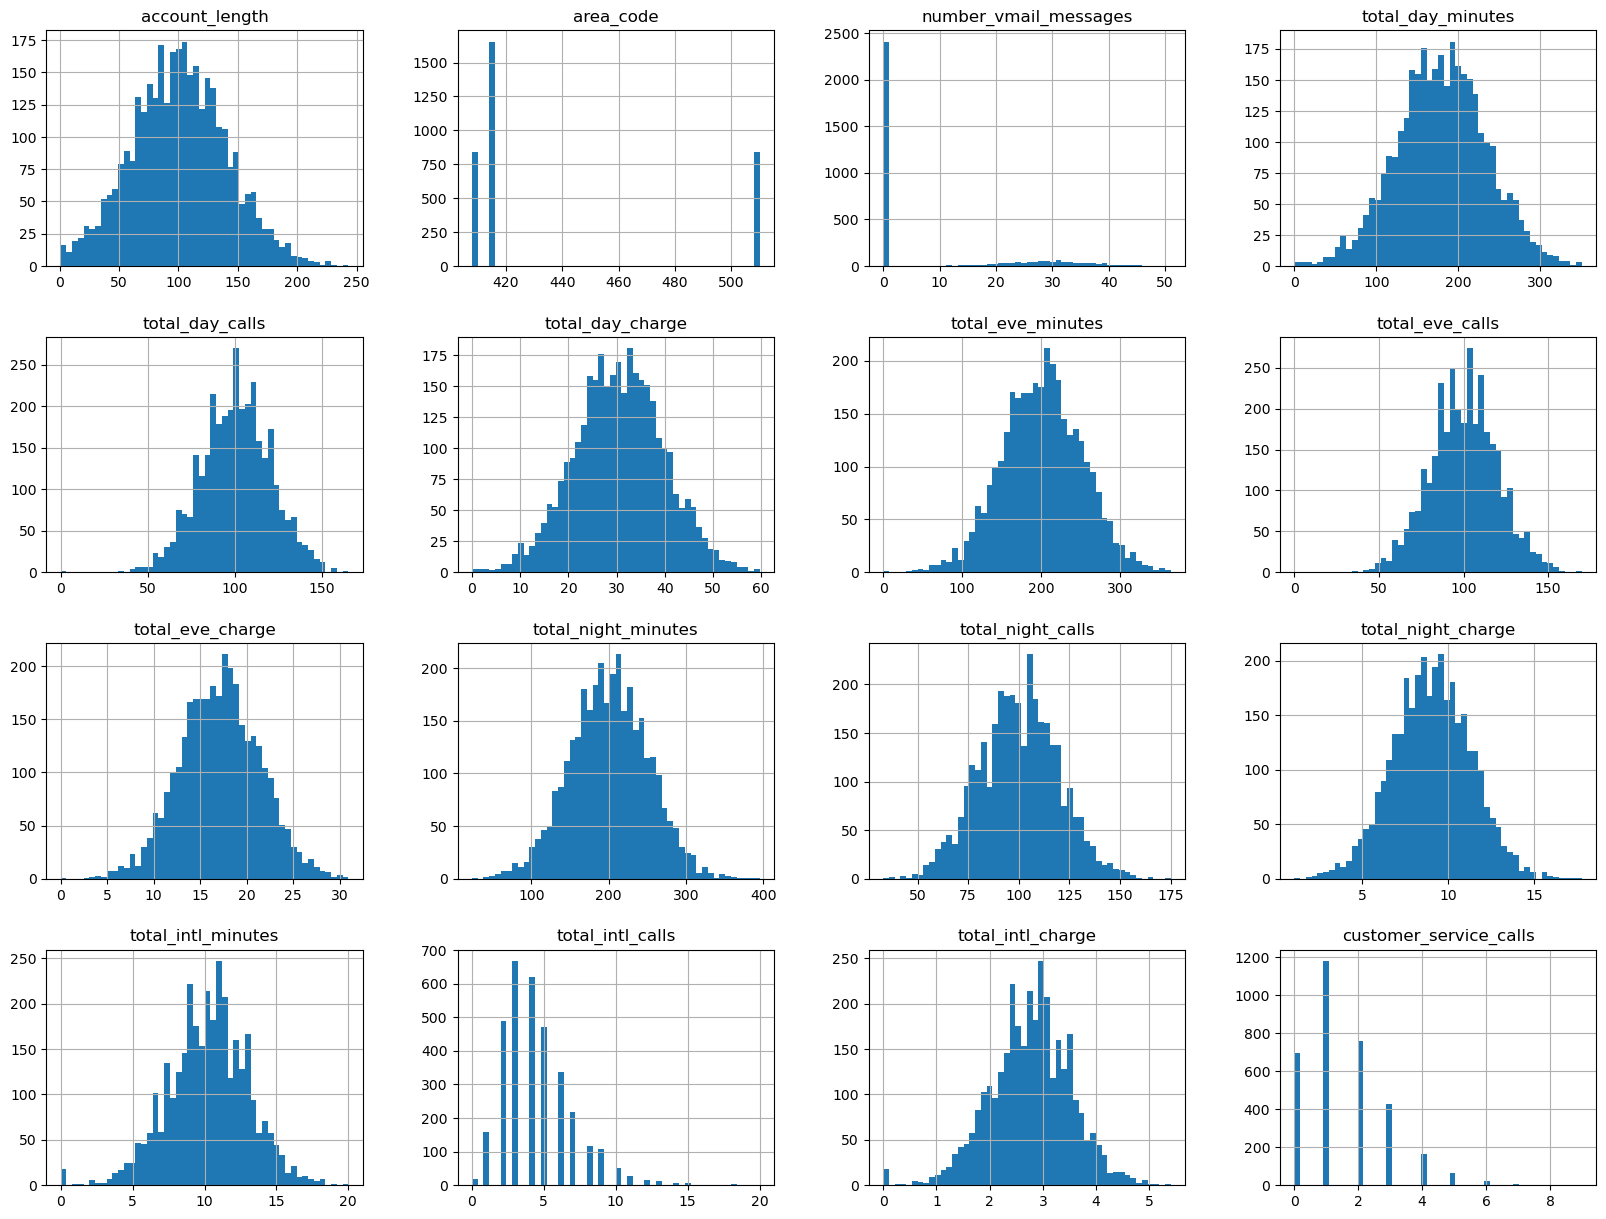

In [9]:
# Feature Distribution
analysis.plot_feature_distribution()

- Many features such as call minutes and charges follow a normal distribution. This suggests that most customers exhibit similar behavior in these aspects, with few outliers

- There is a categorical nature to area codes.
- Features like number_vmail_messages and customer_service_calls have a skewed distribution, indicating that most customers do not use voicemail or make customer service calls frequently.
- The distribution of call minutes and charges across different times of the day(day, evening, night, international) indicating consistent usage patterns among customers.

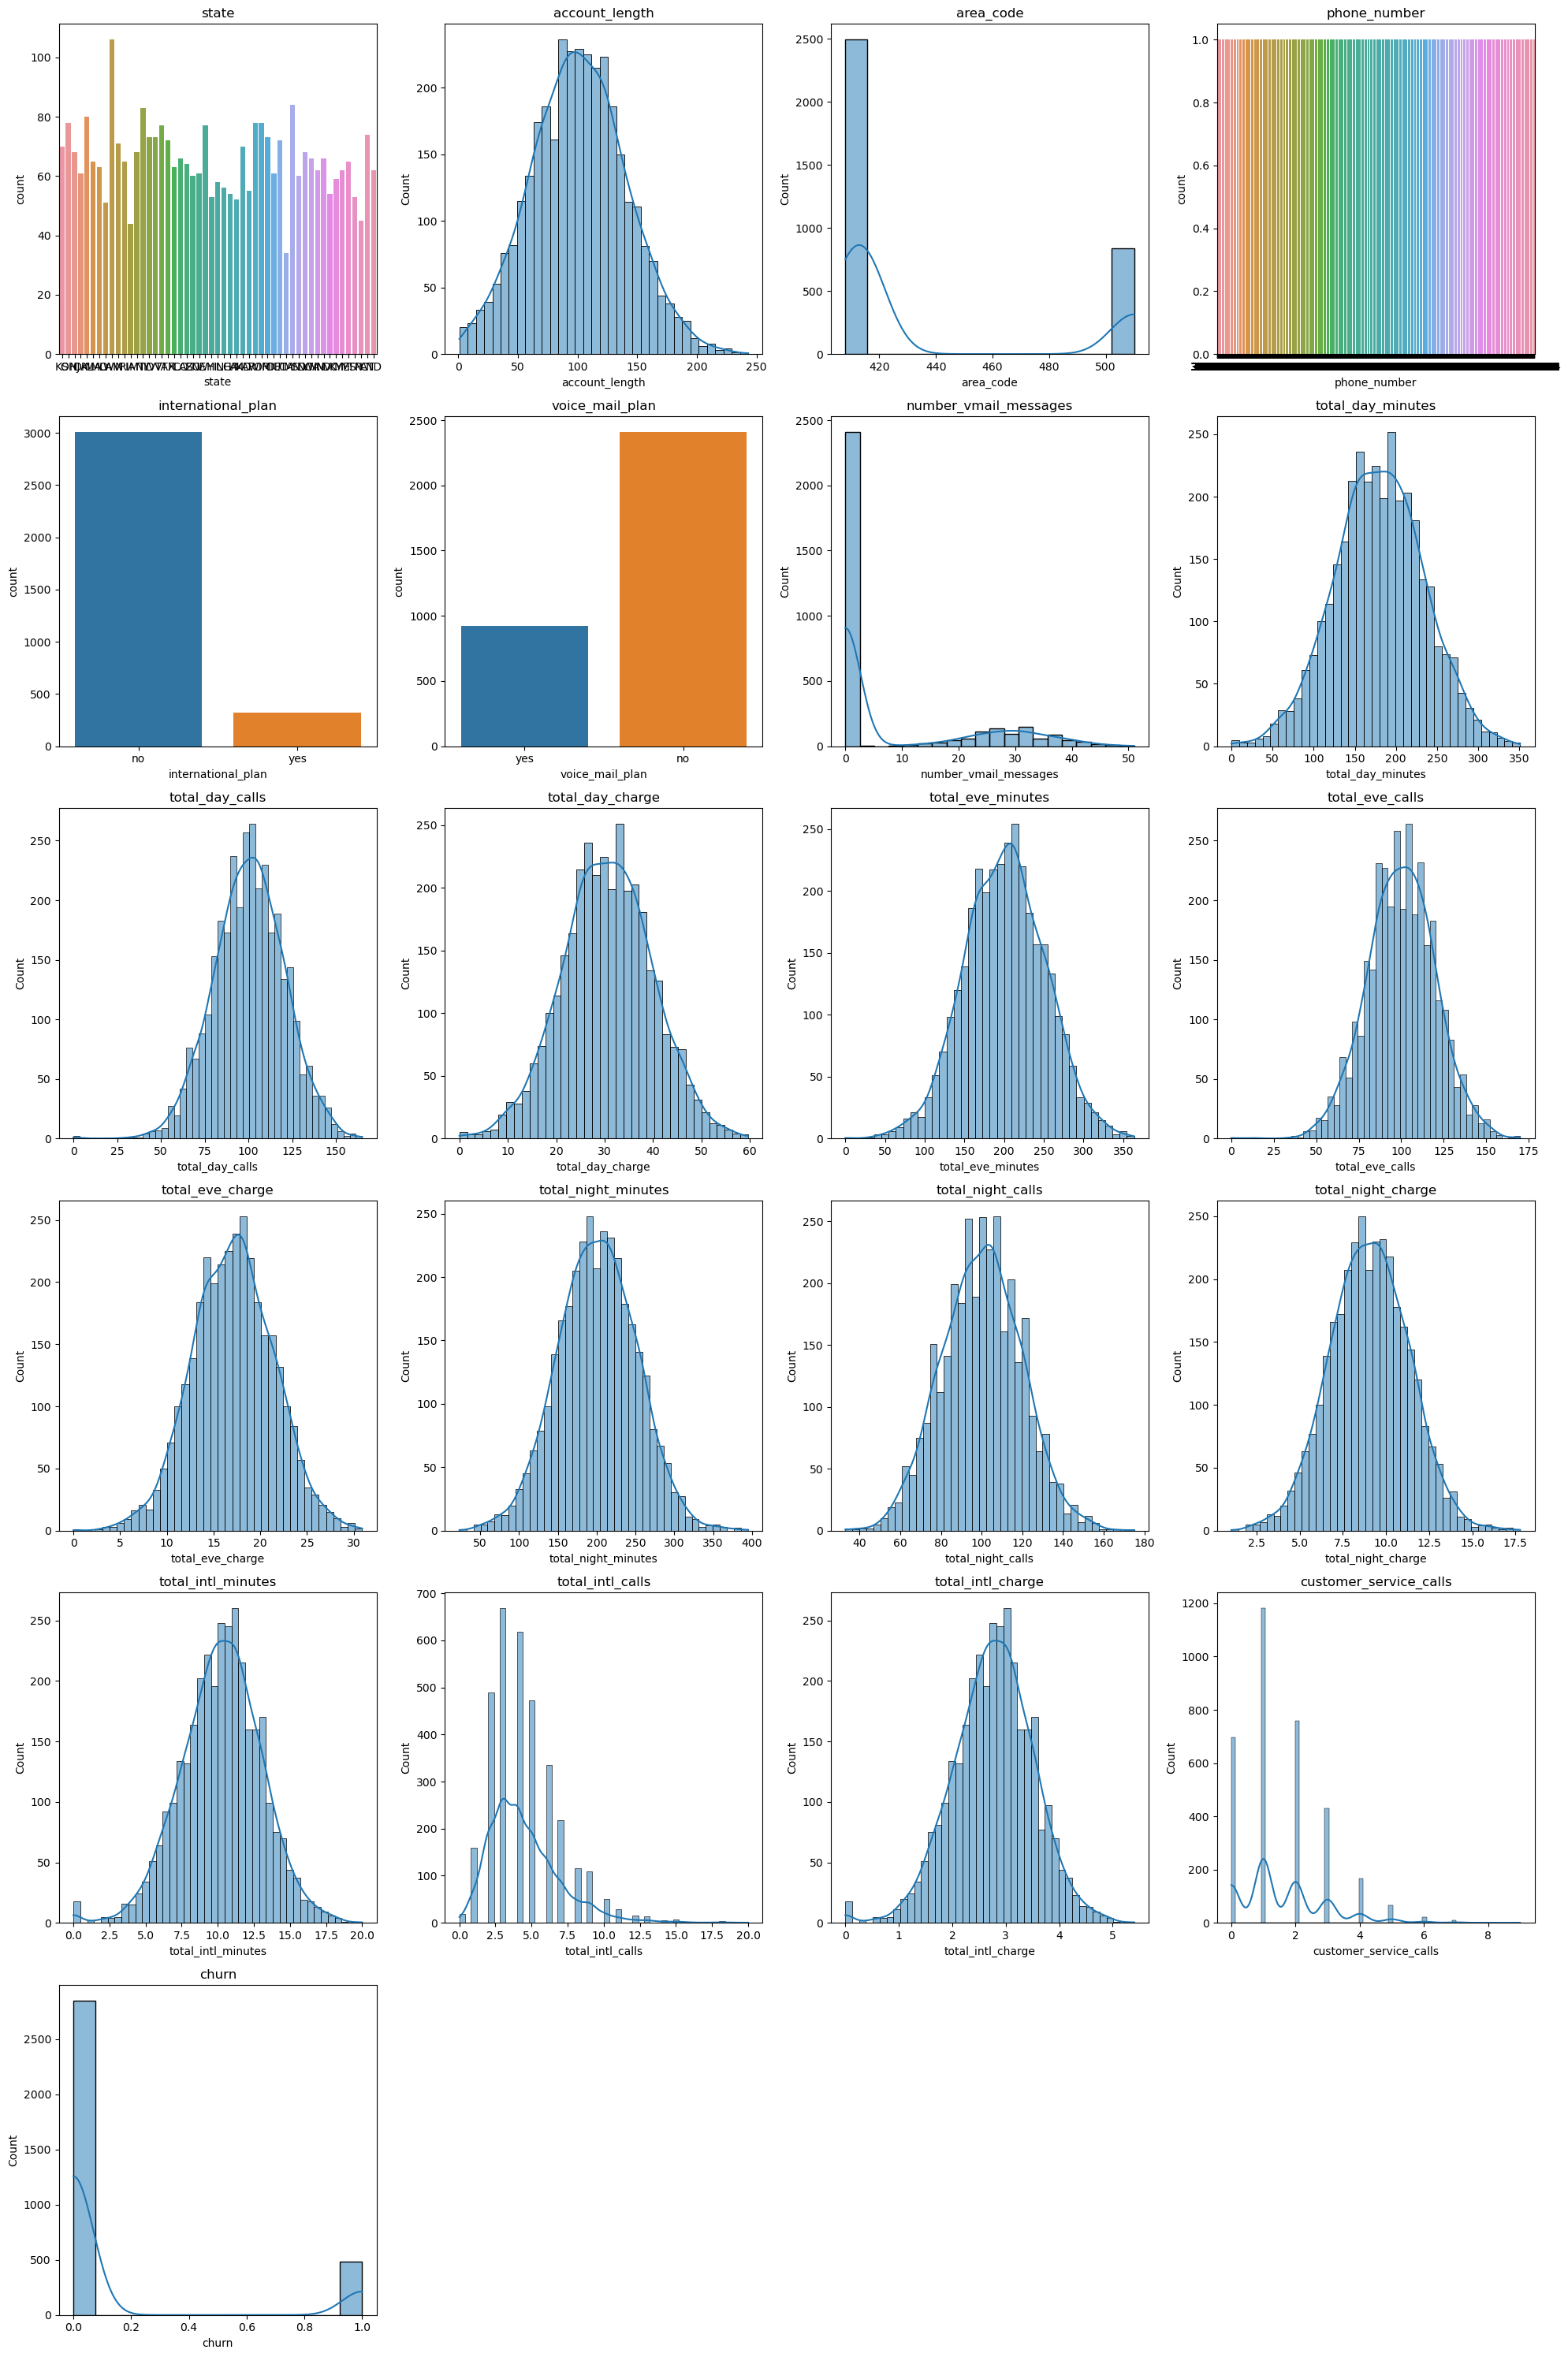

In [10]:
# Univariate Analysis
analysis.univariate_analysis(data.columns)

- **State** has a uniform distribution across many categories indicating data from multiple states. Each state appears to have a similar number of customers in the dataset.

- **Account Length** is normally distributed, with most values ranging between 50 to 150 days. This suggests that most customers have been with the company for a moderate period.
- **Area Code** shows three distinct categories, with '415' being the most common, followed by '510' and '408' being the least common.
- **Phone Number** is likely a unique identifier thus the column should be excluded from further analysis.
- **International Plan** is binary with majority of customers not subscribed to the international plan.
- **Voice Mail Plan** is binary with majority of customers not subscribed to the voicemail plan.
- **Number Vmail Messages** shows that most customers do not use voicemail, with a few customers having a high number of voicemail messages.
- **Total Day Minutes, Total Day Calls, Total Day Charge** are normally distributed, indicating consistent usage patterns during the day.
- **Total Eve Minutes, Total Eve Calls, Total Eve Charge** are normally distributed, indicating consistent usage patterns during the evening.
- **Total Night Minutes, Total Night Calls, Total Night Charge** are normally distributed, indicating consistent usage patterns during the night.
- **Total Intl Minutes, Total Intl Calls, Total Intl Charge** have some skewness, 'total_int_calls' has a right-skewed distribution, indicating that most customers make few international calls. 'total_intl_minutes' and 'total_intl_charge' are somewhat normally distributed but have a tail indicating higher usage by fewer customers.
- **Customer Service Calls** is right-skewed, with most customers making few calls to customer service, but a notable minority making multiple calls.
- **Churn** is binary and shows that the majority of customers have not churned. This indicates an imbalance in the target variable, which should be considered when building predictive models.


In [11]:
# Drop phone number column (not useful for analysis)
data = data.drop('phone_number', axis=1, inplace=True)

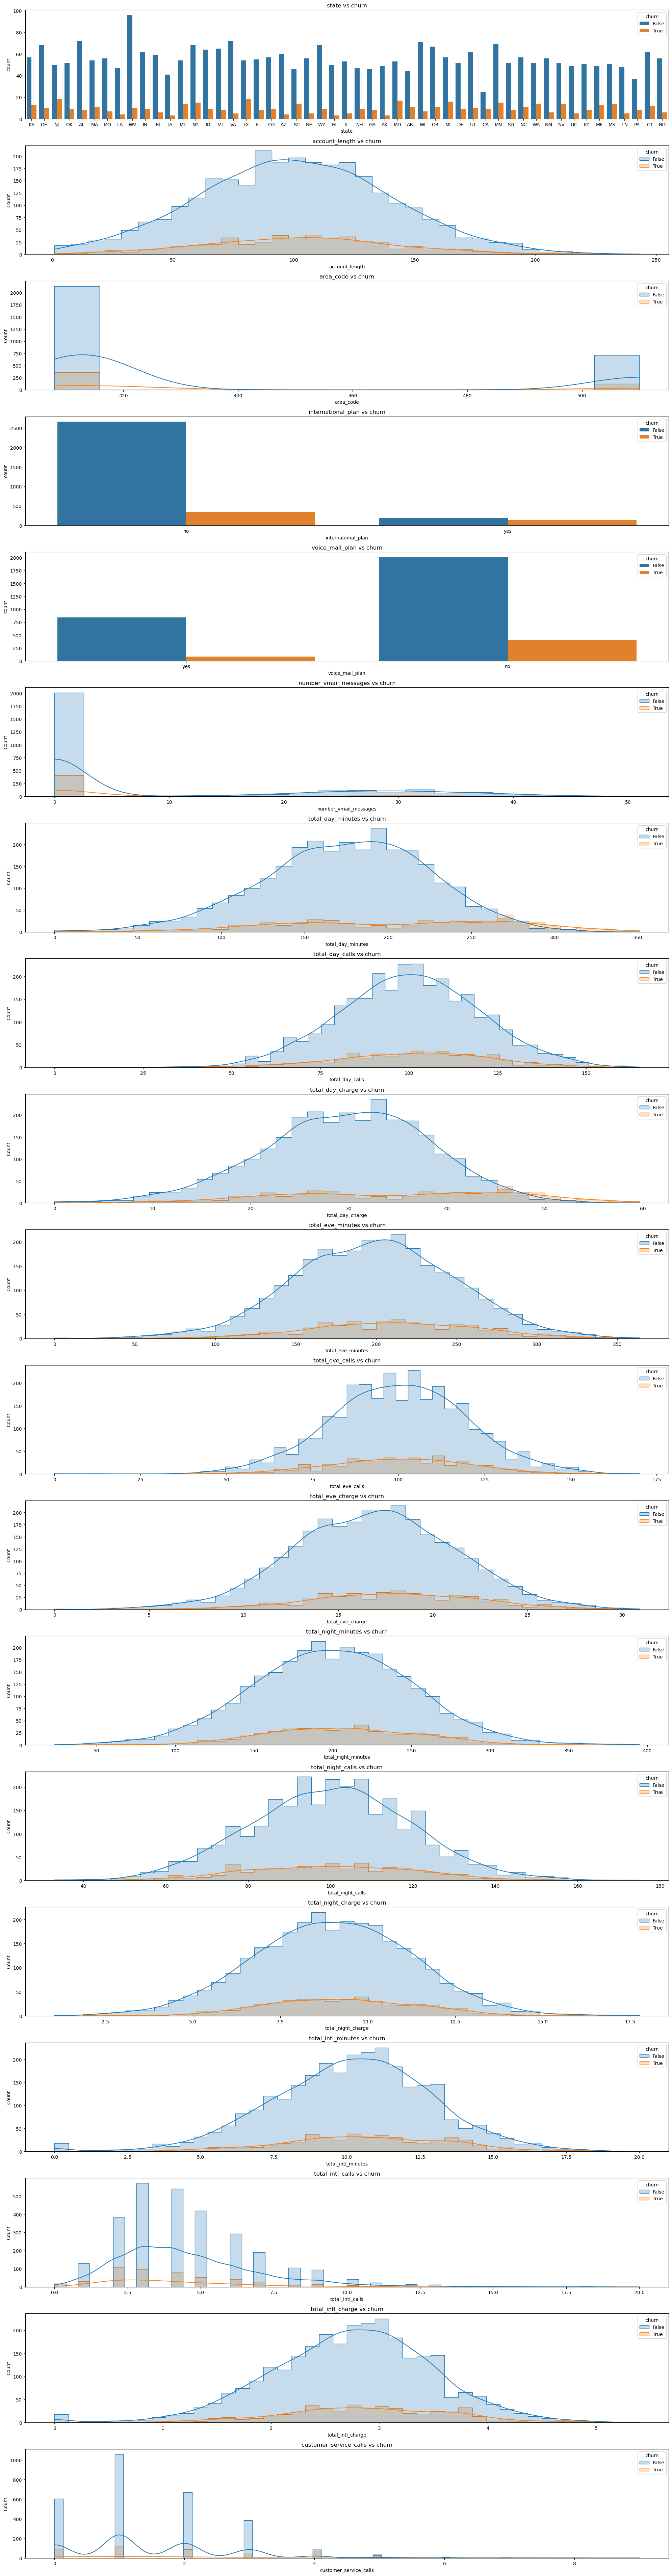

In [12]:
# Bivariate Analysis
analysis.bivariate_analysis(target='churn')


**state vs churn** the churn rate varies across different states, with some states having higher churn rates than others. This suggests that the state may be a relevant feature for predicting churn.

**account_length vs churn** there is no clear relationship between account length and churn, indicating that the length of time a customer has been with the company may not be a strong predictor of churn.

**area_code vs churn** the churn rate is consistent across different area codes, indicating that the area code may not be a strong predictor of churn.

**international_plan vs churn** customers with no international plan have a higher churn rate than those with an international plan, suggesting that the international plan may be a relevant feature for predicting churn.

**voice_mail_plan vs churn** customers with a voice mail plan have a lower churn rate than those without a voice mail plan, suggesting that the voice mail plan may be a relevant feature for predicting churn.

**number_vmail_messages vs churn** customers with a higher number of voicemail messages have a lower churn rate, suggesting that voicemail usage may be a relevant feature for predicting churn.

**total_day_minutes vs churn** there is no clear relationship between total day minutes and churn, indicating that the total day minutes may not be a strong predictor of churn.

**total_day_calls vs churn** there is no clear relationship between total day calls and churn, indicating that the total day calls may not be a strong predictor of churn.

**total_day_charge vs churn** there is no clear relationship between total day charge and churn, indicating that the total day charge may not be a strong predictor of churn.

**total_eve_minutes vs churn** there is no clear relationship between total evening minutes and churn, indicating that the total evening minutes may not be a strong predictor of churn.

**total_eve_calls vs churn** there is no clear relationship between total evening calls and churn, indicating that the total evening calls may not be a strong predictor of churn.

**total_eve_charge vs churn** there is no clear relationship between total evening charge and churn, indicating that the total evening charge may not be a strong predictor of churn.

**total_night_minutes vs churn** there is no clear relationship between total night minutes and churn, indicating that the total night minutes may not be a strong predictor of churn.

**total_night_calls vs churn** there is no clear relationship between total night calls and churn, indicating that the total night calls may not be a strong predictor of churn.

**total_night_charge vs churn** there is no clear relationship between total night charge and churn, indicating that the total night charge may not be a strong predictor of churn.

**total_intl_minutes vs churn** there is no clear relationship between total international minutes and churn, indicating that the total international minutes may not be a strong predictor of churn.

**total_intl_calls vs churn** there is no clear relationship between total international calls and churn, indicating that the total international calls may not be a strong predictor of churn.

**total_intl_charge vs churn** there is no clear relationship between total international charge and churn, indicating that the total international charge may not be a strong predictor of churn.

**customer_service_calls vs churn** customers with a lower number of customer service calls have a lower churn rate, suggesting that the number of customer service calls may be a relevant feature for predicting churn.

